In [84]:
%load_ext autoreload 
%autoreload 2

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

import model as md
import view as vw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
F_main_real=444e3
duration = 100/F_main_real
fs = F_main_real*60

F_noise_1=100e3
F_noise_2=700e3
F_noise_3=200e3
F_noise_4=2e6

phase_real=30

t = np.linspace(0, duration, int(duration * fs))  

U = md.generate_sin(t,F_main_real,2)+md.generate_sin(t,F_noise_1)+md.generate_sin(t,F_noise_2)+md.generate_sin(t,F_noise_3)+md.generate_sin(t,F_noise_4,1,phase_real)
I=md.generate_sin(t,F_main_real,2,phase_real)+md.generate_sin(t,F_noise_1)+md.generate_sin(t,F_noise_2)+md.generate_sin(t,F_noise_3)+md.generate_sin(t,F_noise_4,1,phase_real)

U = md.generate_sin(t,F_main_real,2)
I=md.generate_sin(t,F_main_real,2,phase_real)

phase_real_graph= np.full(len(t), phase_real)

60


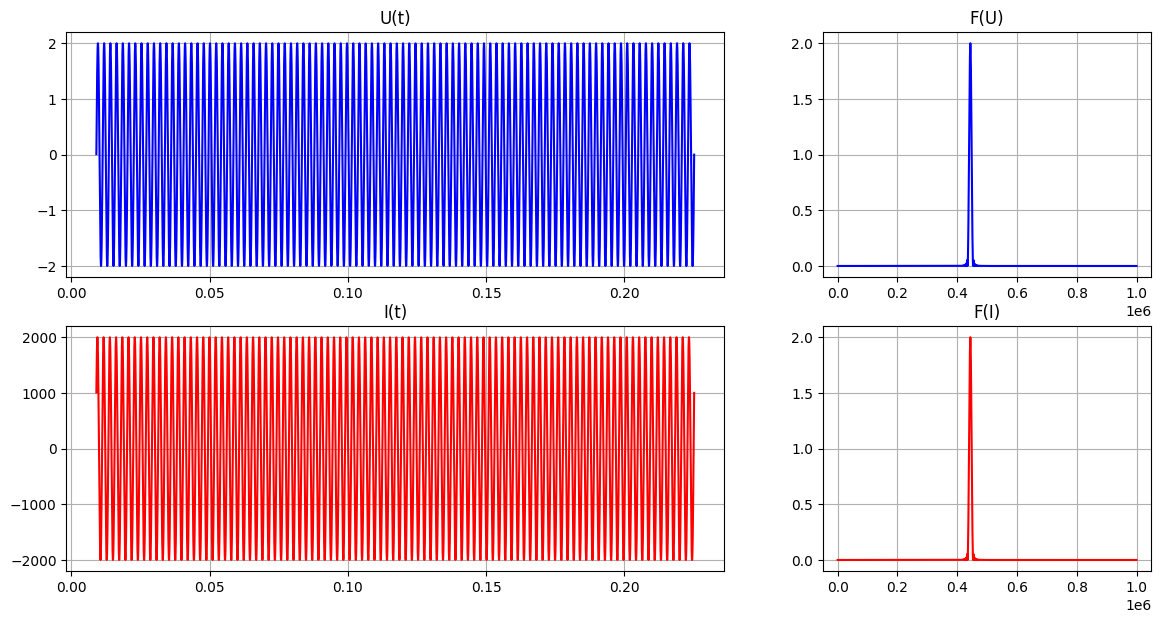

In [86]:
F,V = md.get_spectrum3(t,U)

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc
T_counts=md.convert_to_counts(t,T)
print(T_counts)
window=T_counts*4

vw.show_I_U_2(t,I,U,window)

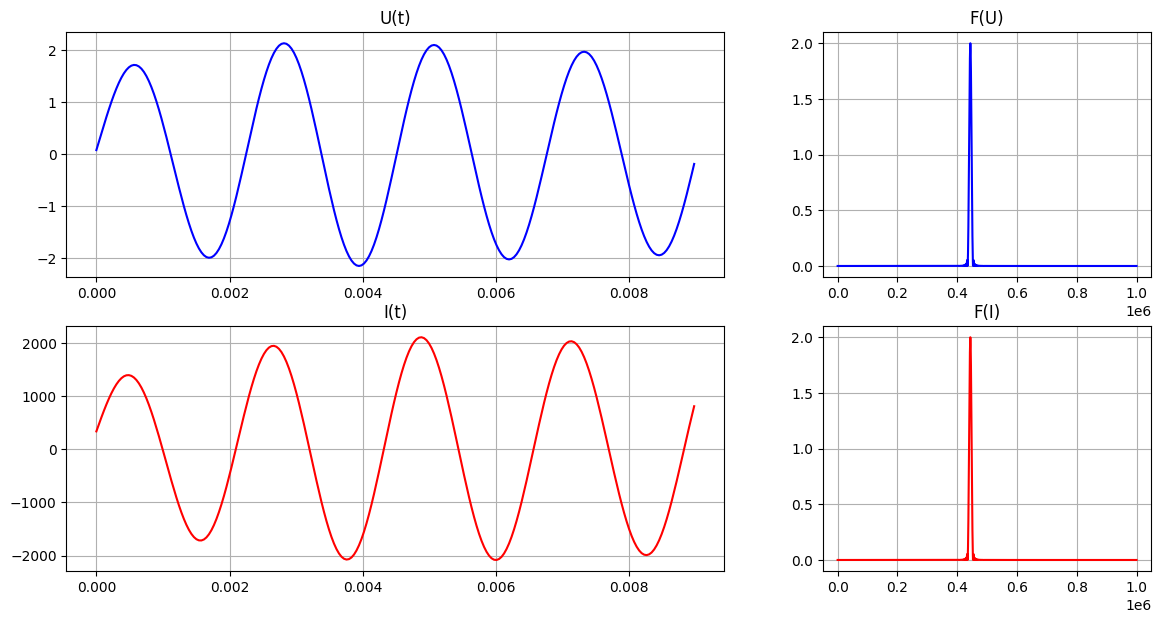

In [87]:
t_f, U_f=md.filter_butter_bandpass(t,U,F_peak_calc,100e3,5)
t_f, I_f=md.filter_butter_bandpass(t,I,F_peak_calc,100e3,5)

vw.show_I_U_2(t_f,I_f, U_f,0,window)

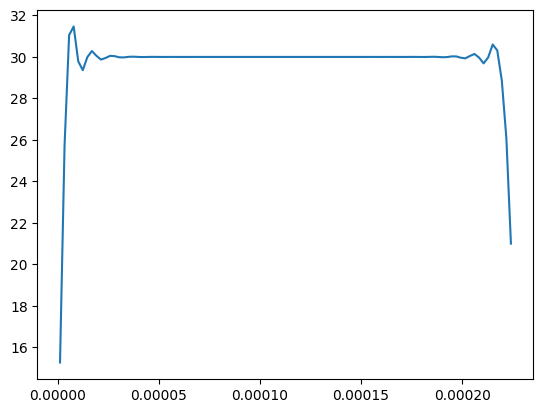

In [88]:
time_maxpoint,phase_maxpoint=md.get_phase_maxpoint(t_f,U_f,I_f,F_peak_calc)
plt.plot(time_maxpoint,phase_maxpoint)

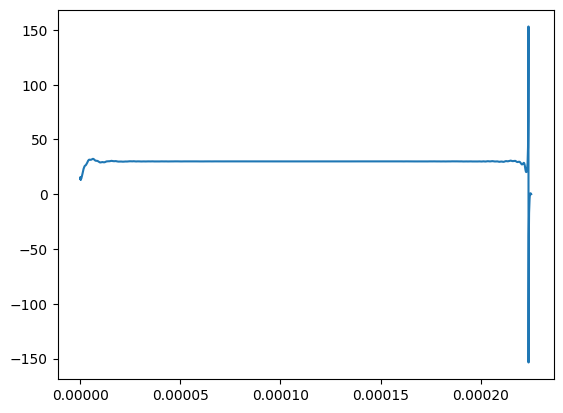

In [89]:
time_hilbert, phase_hilbert=md.get_phase_hilbert(t_f,U_f, I_f)
vw.plot(time_hilbert,phase_hilbert)

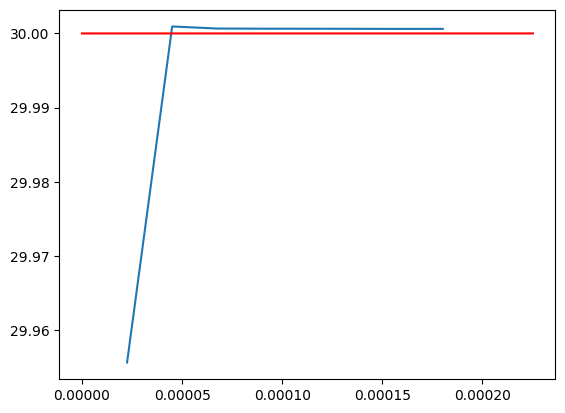

In [90]:
time_FFT, phase_FFT = md.get_phase_FFT(t_f,U_f, I_f, F_peak_calc, n_periods=20, overlap=0.5)
plt.plot(time_FFT, phase_FFT)
plt.plot(t,phase_real_graph,"red")

In [91]:
md.get_kde_mode(phase_FFT)

np.float64(30.0006659085447)

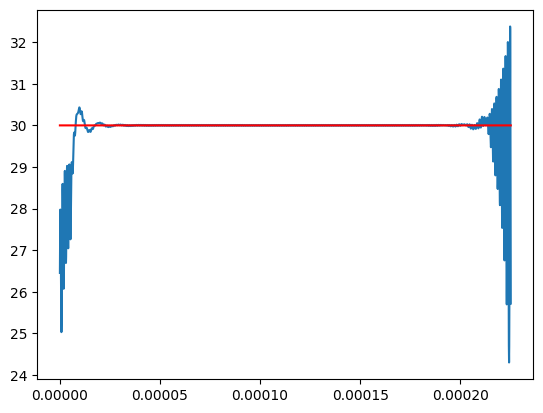

In [92]:
time_lockin, phase_lockin = md.get_phase_lockin(t_f,U_f, I_f,F_peak_calc,5)
plt.plot(time_lockin,phase_lockin)
plt.plot(t,phase_real_graph,"red")

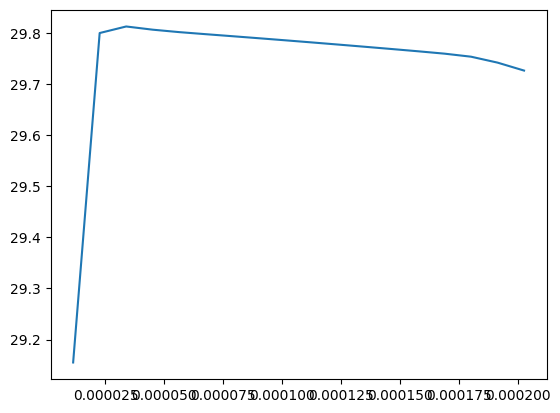

In [93]:
time_xcorr,phasse_xcorr = md.get_phase_xcorr2(t_f,U_f, I_f, F_peak_calc)
plt.plot(time_xcorr,phasse_xcorr)

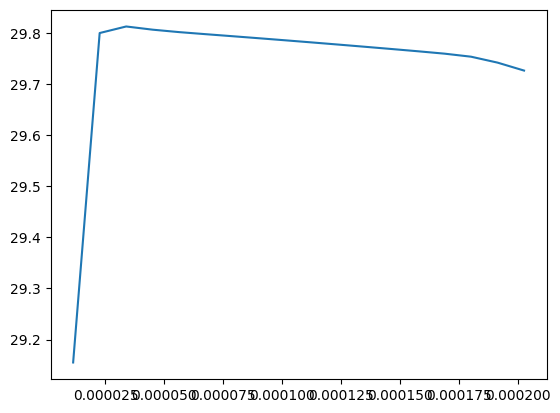

In [94]:
time_xcorr,phasse_xcorr = md.get_phase_xcorr2(t_f,U_f, I_f, F_peak_calc)
plt.plot(time_xcorr,phasse_xcorr)

In [95]:
time_PPV,phase_PPV= md.get_phase_PPV(t_f, I_f,U_f, F_peak_calc)
print(phase_PPV)

31.129935032948794
10.637498606479836
[20.49243643]


In [96]:
md.print_full_stats(F_peak_calc, phase_maxpoint,phase_hilbert,phase_FFT,phase_lockin,phasse_xcorr)

Array 1: Mean phase = 29.6958, KDE mode phase = 30.0096
Array 1: Mean Frel = 778571.2857, KDE mode Frel = 768754.4943
Array 2: Mean phase = 29.6232, KDE mode phase = 30.0506
Array 2: Mean Frel = 780868.7841, KDE mode Frel = 767485.3784
Array 3: Mean phase = 29.9950, KDE mode phase = 30.0007
Array 3: Mean Frel = 769206.4634, KDE mode Frel = 769032.1120
Array 4: Mean phase = 29.9037, KDE mode phase = 30.0007
Array 4: Mean Frel = 772046.8630, KDE mode Frel = 769029.6352
Array 5: Mean phase = 29.7439, KDE mode phase = 29.7792
Array 5: Mean Frel = 777054.0709, KDE mode Frel = 775942.7058
